# Illustration de la progressivité de l'impôt sur le revenu

## Initialisation

Nous importons les modules nécéssaires et initialisons le système socio-fiscal.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
from datetime import date  # module nécessaire pour la définition des dates, dont notamment les dates de naissances
import openfisca_france    # module décrivant le système socio-fiscal français

TaxBenefitSystem = openfisca_france.FranceTaxBenefitSystem  # Initialisation de la classe décrivant le système socio-fiscal français
tax_benefit_system = TaxBenefitSystem()  # Création d'une instance du système socio-fiscal français 

## Concavité de l'impôt

In [80]:
year = 2016
simulation = tax_benefit_system.new_scenario().init_single_entity(
    axes = [
        dict(
            count = 300,
            min = 0,
            max = 50000,
            name = 'salaire_imposable',
            ),
        ],
    period = year,
    parent1 = dict(
        date_naissance = date(1980, 1, 1),
        )
    ).new_simulation()

In [81]:
salaire_imposable = simulation.calculate_add('salaire_imposable', period = year)
impot = - simulation.calculate('irpp', period = year)

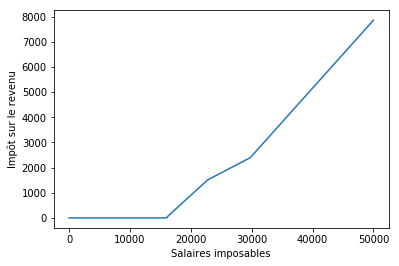

In [82]:
plt.plot(salaire_imposable, impot)
plt.ylabel(u"Impôt sur le revenu")
plt.xlabel(u"Salaires imposables")

L'impôt payé est continu: il n'augmente brusquement son impôt lorsque l'on change de tranche contrairement 
à ce que pensent beaucoup de personnes.

## Taux moyen

In [83]:
taux_moyen = impot / salaire_imposable  

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.


In [84]:
taux_moyen = impot / (salaire_imposable * (salaire_imposable != 0) + (salaire_imposable == 0) )  

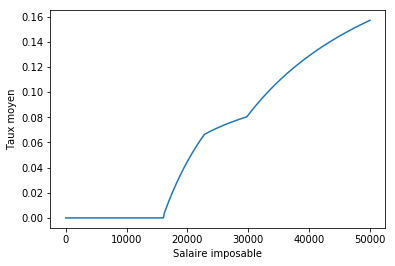

In [85]:
plt.plot(salaire_imposable, taux_moyen)
plt.ylabel("Taux moyen")
plt.xlabel("Salaire imposable")

## Taux marginal

In [86]:
taux_marginal =  (impot[:-1] - impot[1:]) / (salaire_imposable[:-1] - salaire_imposable[1:] ) 

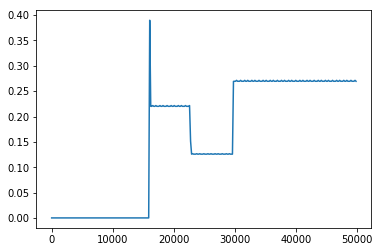

In [87]:
plt.plot(salaire_imposable[:-1], taux_marginal)

In [88]:
taux_marginal[40], taux_marginal[150]

(-0.0, 0.12576793)

On retrouve les atux marginaux des tranches à 14% et à 30% (il ne faut pas oublier l'abattement de 10% pour frais professionnels)

### Remarque: utilisation de fonction dédiées

Il est possible d'utiliser des fonctions dédiées au calcul des taux marginaux et des taux moyens payés sur certaines concept de revenus. On reproduit ci-dessous 

In [89]:
from openfisca_core.rates import average_rate, marginal_rate

In [90]:
revenu_apres_impot = simulation.calculate('revenu_net_individu', period = year) + simulation.calculate('irpp', period = year) 

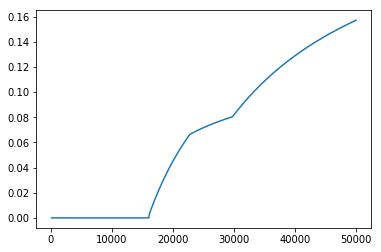

In [91]:
plt.plot(salaire_imposable[1:], average_rate(revenu_apres_impot[1:], salaire_imposable[1:]))

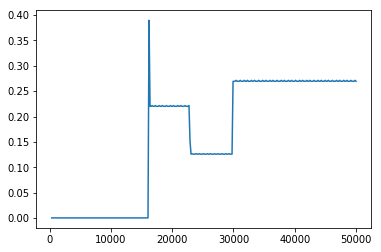

In [92]:
plt.plot(salaire_imposable[2:], marginal_rate(revenu_apres_impot[1:], salaire_imposable[1:]))

Exercice: montrer que le taux moyen tend vers le taux marginal à l'infini